In [1]:
import pandas as pd 
import csv
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.rcParams.update({'figure.max_open_warning': 0})

#print(plt.style.available)

In [2]:
def text_input_path(path_fill):
    global path
    path = path_fill
    return path_fill

interact(text_input_path, path_fill='./');

files = os.listdir(path)
curated_list = []

for file in files:
    if file.endswith('.csv'):
        curated_list.append(file)

def file_dropdown(path_target_fill):
    global file_target
    file_target = path_target_fill
    return path_target_fill

interact(file_dropdown, path_target_fill=list(curated_list));

interactive(children=(Text(value='./', description='path_fill'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='path_target_fill', options=('CreditCard.csv', 'insurance2.csv'), v…

In [5]:
df = pd.read_csv(file_target)

In [6]:
def col_dropdown(column_target_fill):
    global column_target
    column_target = column_target_fill
    return column_target_fill

interact(col_dropdown, column_target_fill=list(df.columns));

interactive(children=(Dropdown(description='column_target_fill', options=('age', 'sex', 'bmi', 'children', 'sm…

Column Name:age
 count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
Column Name:sex
 count    1338.000000
mean        0.505232
std         0.500160
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
Column Name:bmi
 count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
Column Name:children
 count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
Column Name:smoker
 count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000


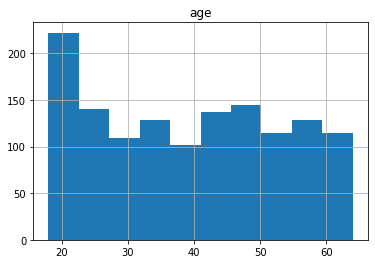

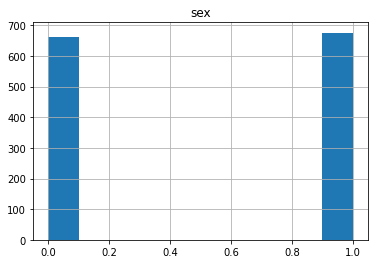

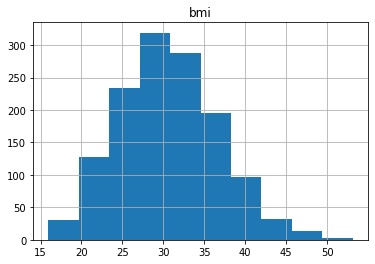

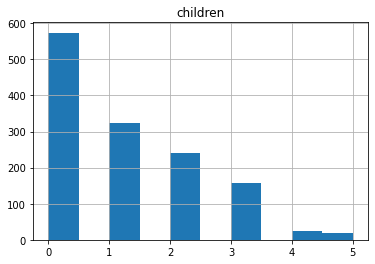

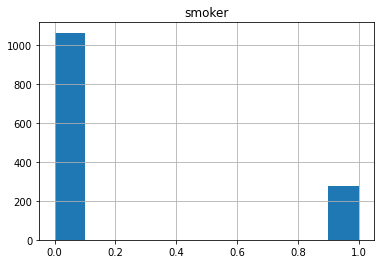

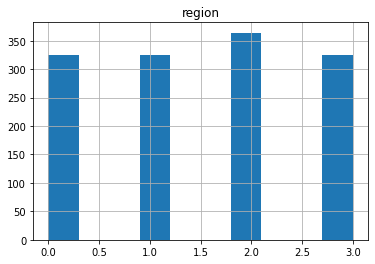

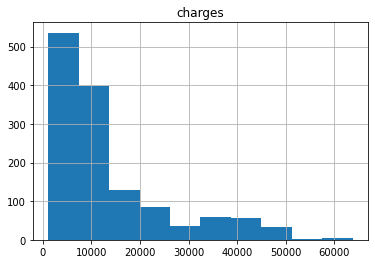

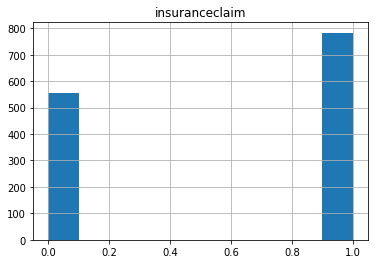

In [21]:
columns = df.columns

for column in columns:
    i=0
    desc = df[column].describe()
    df.hist(column)
    print("Column Name:{}\n {}".format(column, desc))
    i = i + 1 

In [22]:
def features_target(column_target):
    features = list(df.columns)
    if column_target in features: features.remove(column_target)
    return features

features = features_target(column_target)
features

#Separating Features Values
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

#Separating Target Value
y = df.loc[:, [column_target]].values
y

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[[column_target]]], axis = 1)

In [23]:
def s_slider(s_slider_fill):
    global s_size
    s_size = s_slider_fill
    return s_slider_fill

s_slider_1 = interactive(s_slider,s_slider_fill=(2,100,1));\
display(s_slider_1) 


interactive(children=(IntSlider(value=51, description='s_slider_fill', min=2), Output()), _dom_classes=('widge…

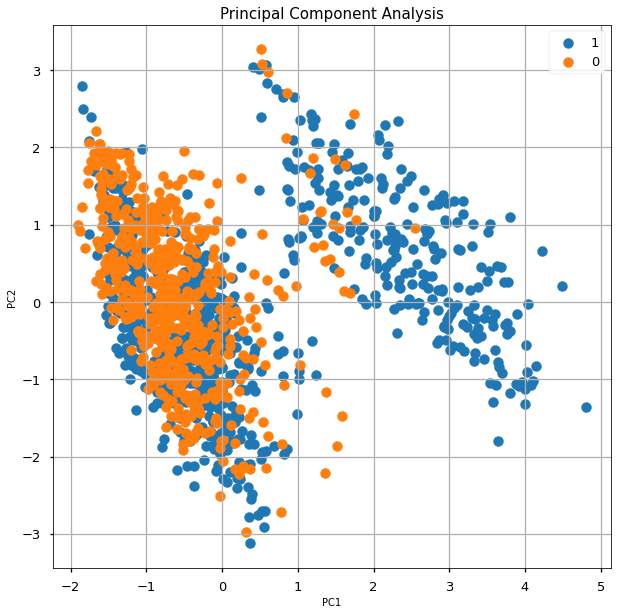

In [27]:
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC1', fontsize = 10)
    ax.set_ylabel('PC2', fontsize = 10)
    ax.set_title('Principal Component Analysis', fontsize = 15)

    targets = finalDf[column_target].unique()

    for target in zip(targets):
        indicesToKeep = finalDf[column_target] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , s = s_slider_1.result)
    ax.legend(targets)
    ax.grid()
    plt.show()

In [25]:
#TODO JSON

#PCA 1d ??? READ 

SyntaxError: invalid syntax (<ipython-input-25-46ae77f25e9f>, line 2)